In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "D:/DATA/Electric Vehicles.csv"
df = pd.read_csv(path)
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [3]:
df.shape

(112634, 17)

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
# Renaming the column
df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility' : 'CAFV Eligibility'},inplace = True)

In [6]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type', 'CAFV Eligibility',
       'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN (1-10)             112634 non-null  object 
 1   County                 112634 non-null  object 
 2   City                   112634 non-null  object 
 3   State                  112634 non-null  object 
 4   Postal Code            112634 non-null  int64  
 5   Model Year             112634 non-null  int64  
 6   Make                   112634 non-null  object 
 7   Model                  112614 non-null  object 
 8   Electric Vehicle Type  112634 non-null  object 
 9   CAFV Eligibility       112634 non-null  object 
 10  Electric Range         112634 non-null  int64  
 11  Base MSRP              112634 non-null  int64  
 12  Legislative District   112348 non-null  float64
 13  DOL Vehicle ID         112634 non-null  int64  
 14  Vehicle Location       112610 non-nu

Check for Missing Values

In [8]:
df.isnull().sum()

VIN (1-10)                 0
County                     0
City                       0
State                      0
Postal Code                0
Model Year                 0
Make                       0
Model                     20
Electric Vehicle Type      0
CAFV Eligibility           0
Electric Range             0
Base MSRP                  0
Legislative District     286
DOL Vehicle ID             0
Vehicle Location          24
Electric Utility         443
2020 Census Tract          0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Univariate Analysis

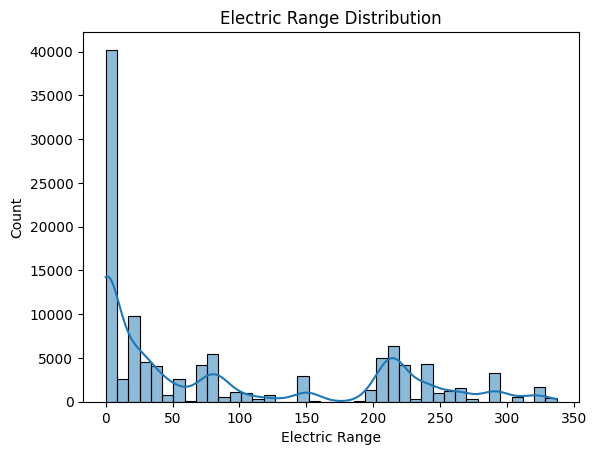

In [10]:
# Histogram for Electric Range
sns.histplot(df['Electric Range'], kde=True)
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range')
plt.show()


The histogram of the Electric Range shows that a large number of vehicles have an electric range of 0 to 50 miles, indicating a significant proportion of either hybrid vehicles or those with limited electric-only capabilities. There are fewer vehicles with higher ranges, but there are distinct peaks around 100, 150, and 200 miles, which suggests that there are specific popular ranges for electric vehicles designed for medium to long distances.

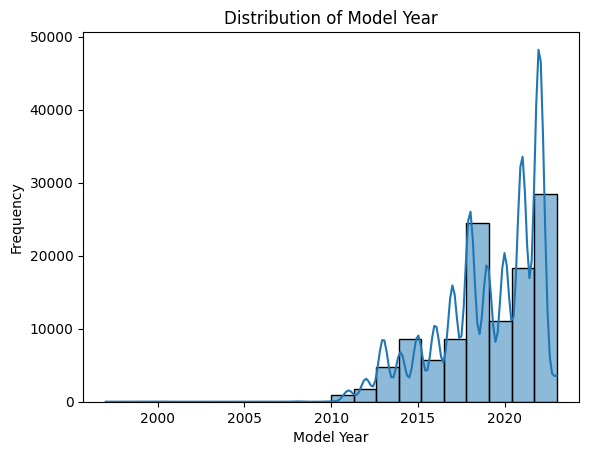

In [11]:
sns.histplot(df['Model Year'], bins=20, kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

There is rapid increase in the production of electric vehicles in the recent years.

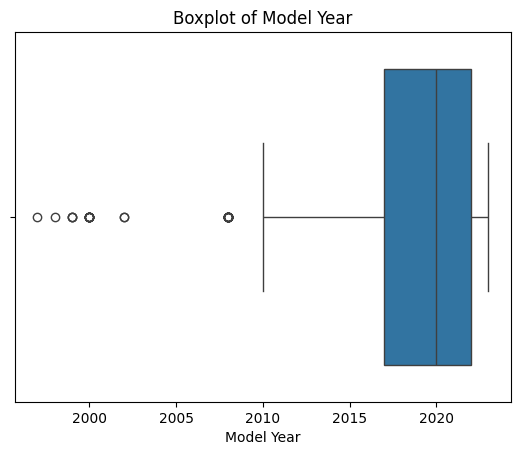

In [12]:
# Boxplot for Model Year
sns.boxplot(x=df['Model Year'])
plt.title('Boxplot of Model Year')
plt.show()

The boxplot reveals a concentration of newer electric vehicles, with a majority of models produced between 2015 and 2020. However, the presence of outliers suggests a small number of vehicles with significantly older model years.

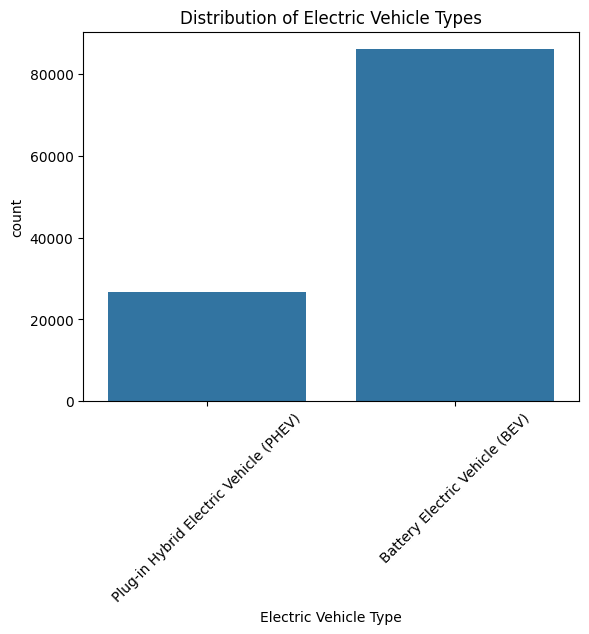

In [13]:
# Distribution of Electric Vehicle Types
sns.countplot(x='Electric Vehicle Type', data=df)
plt.title('Distribution of Electric Vehicle Types')
plt.xticks(rotation=45)
plt.show()

From this, it is very clear that Battery electirc vehicles are significantly more than PHEvechicles

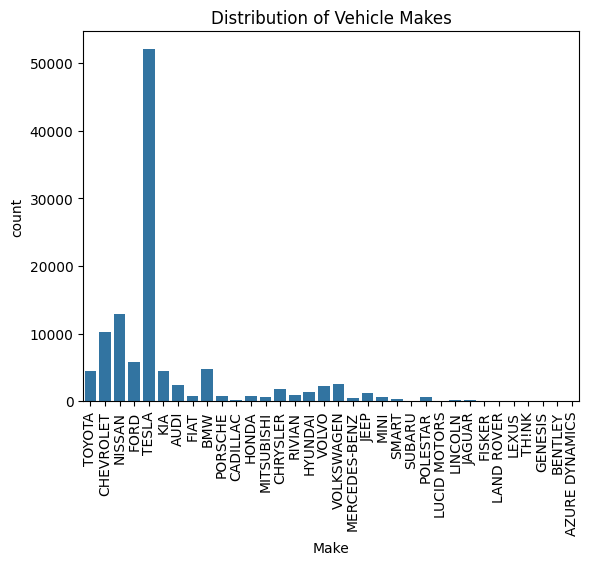

In [14]:
# Distribution of Vehicle Makes
sns.countplot(x='Make', data=df)
plt.title('Distribution of Vehicle Makes')
plt.xticks(rotation=90)
plt.show()

Tesla has produced more number of electric vehicles compared to any other makers. Secondly, nissan has produced more in number

In [15]:
def numerical_univariate(num_data):
  for col_name in num_data:
    print('*'*10, col_name , '*'*10)
    print(num_data[col_name].agg(['min','max','mean','median','std','skew','kurt']))
    print()

In [16]:
numerical_univariate(df[['Model Year','Electric Range']])

********** Model Year **********
min       1997.000000
max       2023.000000
mean      2019.003365
median    2020.000000
std          2.892364
skew        -0.817579
kurt        -0.001160
Name: Model Year, dtype: float64

********** Electric Range **********
min         0.000000
max       337.000000
mean       87.812987
median     32.000000
std       102.334216
skew        0.817103
kurt       -0.876312
Name: Electric Range, dtype: float64



In [17]:
def categorical_univariate(discrete_data):
  for col_name in discrete_data:
    print('*'*10 , col_name , "*"*10)
    print(discrete_data[col_name].agg(['count','unique','nunique']))
    print('value_counts: \n', discrete_data[col_name].value_counts(normalize = True))
    print()

In [18]:
categorical_univariate(df[['Make','Electric Vehicle Type']])

********** Make **********
count                                                 112634
unique     [TOYOTA, CHEVROLET, NISSAN, FORD, TESLA, KIA, ...
nunique                                                   34
Name: Make, dtype: object
value_counts: 
 Make
TESLA             0.462365
NISSAN            0.114353
CHEVROLET         0.090399
FORD              0.051663
BMW               0.041551
KIA               0.039801
TOYOTA            0.039109
VOLKSWAGEN        0.022320
AUDI              0.020704
VOLVO             0.020314
CHRYSLER          0.015928
HYUNDAI           0.012536
JEEP              0.010228
RIVIAN            0.007857
FIAT              0.007298
PORSCHE           0.007262
HONDA             0.007032
MINI              0.005611
MITSUBISHI        0.005220
POLESTAR          0.004954
MERCEDES-BENZ     0.004492
SMART             0.002424
JAGUAR            0.001944
LINCOLN           0.001492
CADILLAC          0.000959
LUCID MOTORS      0.000577
SUBARU            0.000524
LAND ROVER    

### Bivariate Analysis

#### Top Makes with Highest Average Electric Range

C:\Users\ATHUL\AppData\Local\Temp\ipykernel_11516\3997445917.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Electric Range', y='Make', data=average_range_makes, palette='husl')  # Use a color palette


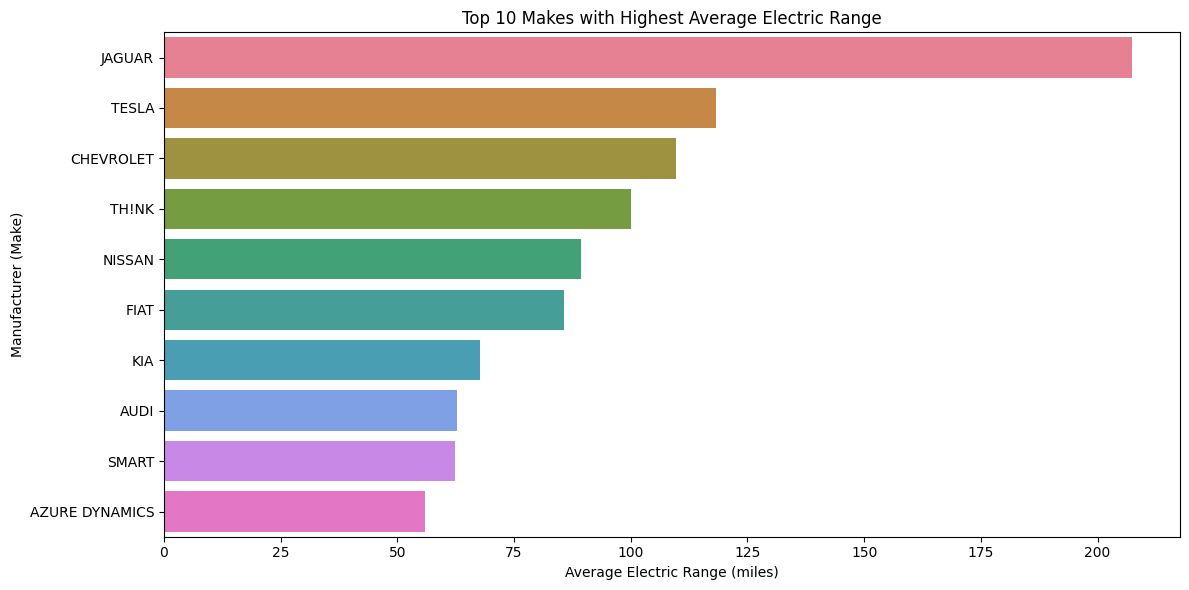

In [19]:
# Calculating the average electric range for each make
average_range_makes = df.groupby('Make')['Electric Range'].mean().reset_index()

# Sorting the values to get the top makes
average_range_makes = average_range_makes.sort_values(by='Electric Range', ascending=False).head(10)

# Plotting the top makes with their average electric ranges with different colors
plt.figure(figsize=(12, 6))
sns.barplot(x='Electric Range', y='Make', data=average_range_makes, palette='husl')  # Use a color palette
plt.title('Top 10 Makes with Highest Average Electric Range')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Manufacturer (Make)')
plt.tight_layout()
plt.show()

Jaguar electric vehicles exhibit a higher average range compared to other manufacturers. This indicates that while Tesla produces a larger number of vehicles, Jaguar's models offer superior average electric range.

#### Analysis of Electric Vehicle Type and CAFV Eligibility

In [20]:
# Creating a normalized crosstab by index (row)
crosstab = pd.crosstab(df['Electric Vehicle Type'],df['CAFV Eligibility'],normalize='index')

crosstab

CAFV Eligibility                        Clean Alternative Fuel Vehicle Eligible  \
Electric Vehicle Type                                                             
Battery Electric Vehicle (BEV)                                         0.543896   
Plug-in Hybrid Electric Vehicle (PHEV)                                 0.445280   

CAFV Eligibility                        Eligibility unknown as battery range has not been researched  \
Electric Vehicle Type                                                                                  
Battery Electric Vehicle (BEV)                                                   0.455999              
Plug-in Hybrid Electric Vehicle (PHEV)                                           0.000000              

CAFV Eligibility                        Not eligible due to low battery range  
Electric Vehicle Type                                                          
Battery Electric Vehicle (BEV)                                       0.000105  
Plug-in Hybrid Electric Vehicle (PHEV)                               0.554720

<Axes: ylabel='Electric Vehicle Type'>

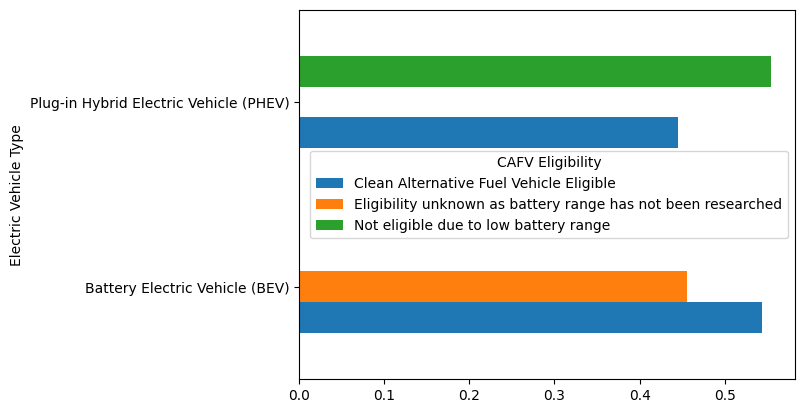

In [21]:
crosstab.plot(kind='barh')

Battery Electric Vehicles (BEVs) are more likely to be eligible as Clean Alternative Fuel Vehicles (CAFV) than Plug-in Hybrid Electric Vehicles (PHEVs), with a higher proportion of BEVs meeting the eligibility criteria.

#### Electric Range vs. Model Year

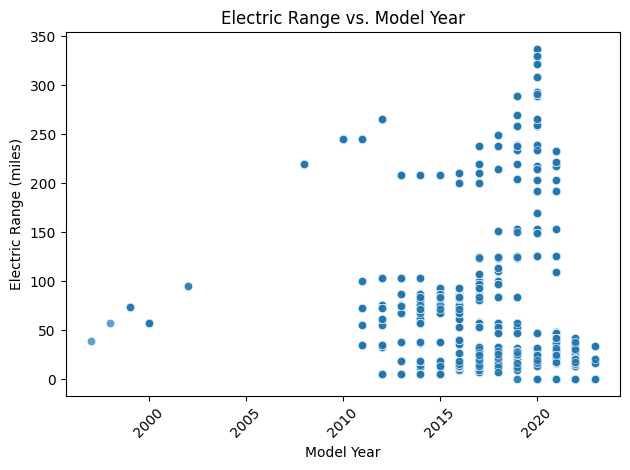

In [22]:
sns.scatterplot(x='Model Year', y='Electric Range', data=df, alpha=0.7)
plt.title('Electric Range vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The scatterplot illustrates a clear positive correlation between electric vehicle range and model year, suggesting that newer models tend to have significantly longer ranges than older ones.

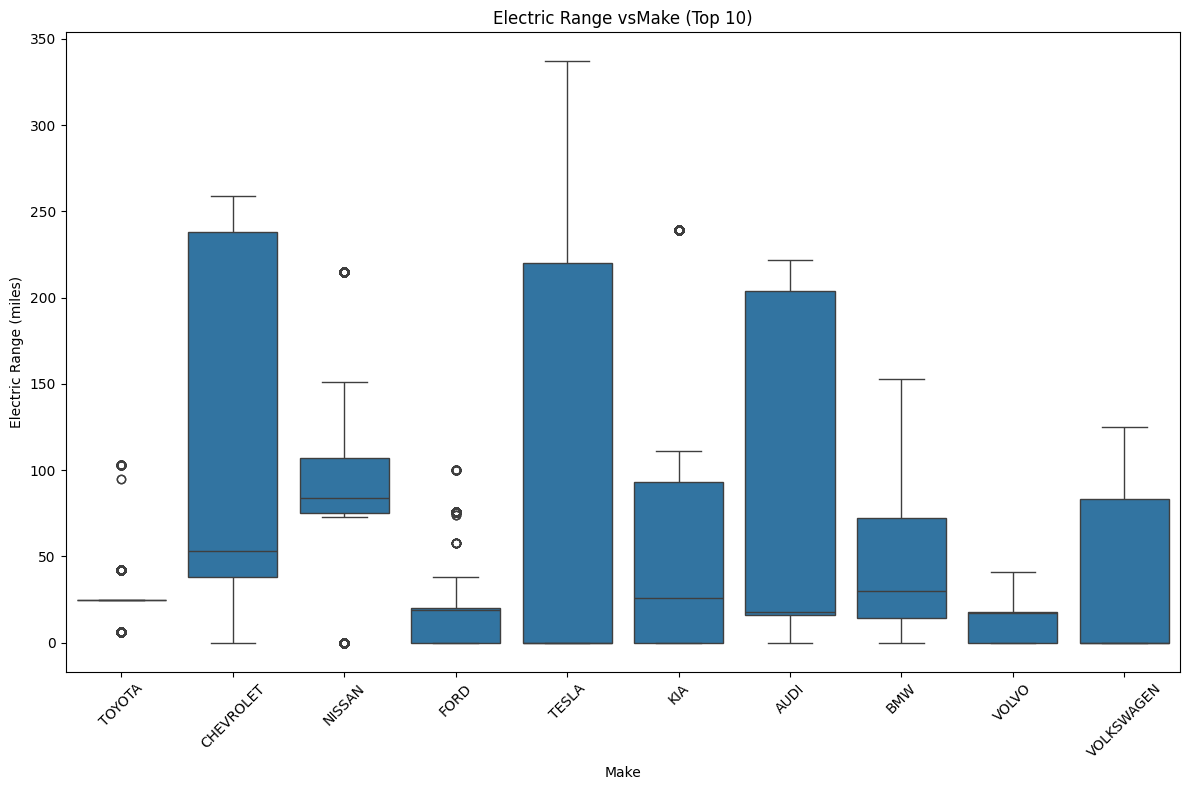

In [38]:
# Group by 'Vehicle Make' and get the top 10 makes
top_makes = df['Make'].value_counts().nlargest(10).index
top_makes_df = df[df['Make'].isin(top_makes)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Make', y='Electric Range', data=top_makes_df)
plt.xticks(rotation=45)
plt.title('Electric Range vsMake (Top 10)')
plt.xlabel('Make')
plt.ylabel('Electric Range (miles)')
plt.tight_layout()
plt.show()

## Choropleth Animation

In [23]:
! pip install plotly

In [24]:
import plotly.express as px

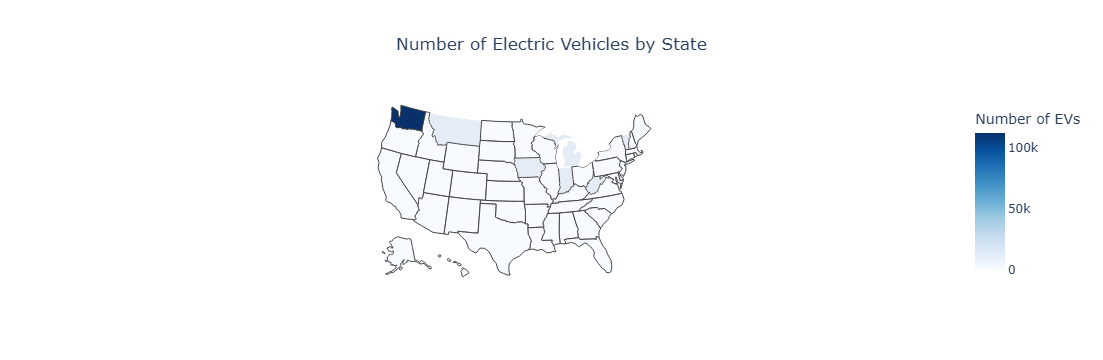

In [25]:
ev_count_by_state = df.groupby('State').size().reset_index(name='ev_count')

# Create the Choropleth map
fig = px.choropleth(
    ev_count_by_state,
    locations='State',  # Column representing state names
    locationmode='USA-states',  # This maps 'state' to U.S. states
    color='ev_count',  # Color by the count of electric vehicles
    color_continuous_scale='Blues',  # Color scale
    scope='usa',  # Restrict map to the USA
    labels={'ev_count': 'Number of EVs'},  # Label for the color legend
    title='Number of Electric Vehicles by State'  # Title of the map
)

# Update the layout for better visualization
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),  # Set background color
    title_x=0.5  # Center the title
)

# Display the map
fig.show()

### EV Make Count Over the Years using Bar Chart Race

In [26]:
!pip install bar-chart-race

In [27]:
# Calculating the count of EVs by Make and Year
count_df = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Pivot the DataFrame to the required format
pivot_df = count_df.pivot(index='Model Year', columns='Make', values='Count').fillna(0)


In [34]:
import bar_chart_race as bcr
import warnings
from IPython.display import Image

C:\Users\ATHUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



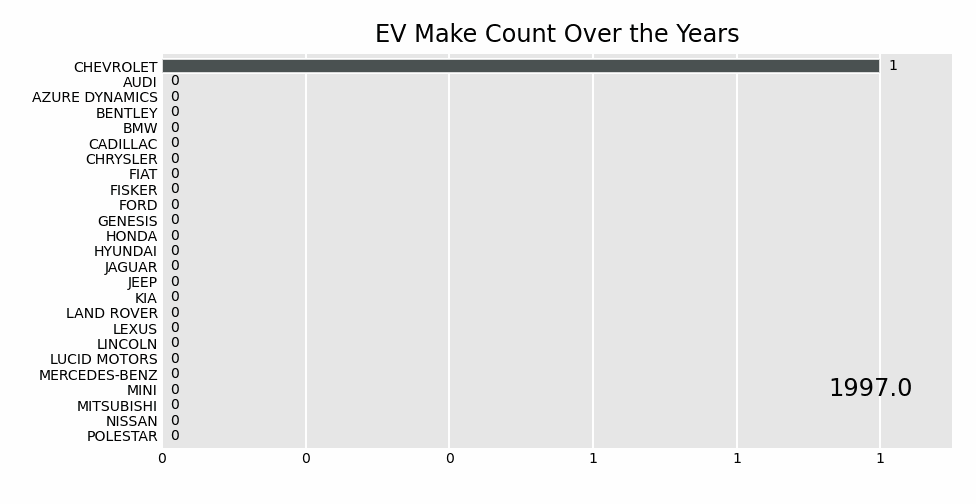

In [36]:
# Ignore UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# Creating the racing bar plot and saving as a GIF
bcr.bar_chart_race(df=pivot_df,filename='EV_make_racing_bar_plot.gif',orientation='h',sort='desc',n_bars=25,
                   title='EV Make Count Over the Years',filter_column_colors=True,period_length=1000,writer='pillow')

Image(filename='EV_make_racing_bar_plot.gif')